In [ ]:
pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing insta

In [ ]:
pip install tensorflow==2.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0.post1
    Uninstalling tensorflow-2.15.0.post1:
      Successfully uninstalled tensorflow-2.15.0.post1


In [ ]:
import pandas as pd
import numpy as np, gc
import matplotlib.pyplot as plt
import tensorflow as tf
#import tensorflow_addons as tfa
import tensorflow_decision_forests as tfdf
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "drive/My Drive/train.csv"
headings= pd.read_csv(data_path, nrows=0)
print("The features of the dataset are: ", headings.columns.tolist())


The features of the dataset are:  ['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level', 'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid', 'fullscreen', 'hq', 'music', 'level_group']


In [ ]:
data_types={
    'elapsed_time':np.float32,
    'event_name':'category',
    'name':'category',
    'level':np.float32,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}


In [ ]:
data_path = "drive/My Drive/train.csv"
dataset= pd.read_csv(data_path, dtype=data_types)
print(f"Full train dataset shape: {dataset.shape}")


Full train dataset shape: (26296946, 20)


In [ ]:
dataset.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0.0,cutscene_click,basic,0.0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323.0,person_click,basic,0.0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831.0,person_click,basic,0.0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147.0,person_click,basic,0.0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863.0,person_click,basic,0.0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [ ]:
dataset.iloc[len(dataset)-1]

session_id           22100221145014656
index                             1604
elapsed_time                 5487952.0
event_name                  checkpoint
name                             basic
level                             22.0
page                               NaN
room_coor_x                        NaN
room_coor_y                        NaN
screen_coor_x                      NaN
screen_coor_y                      NaN
hover_duration                     NaN
text                               NaN
fqid                    chap4_finale_c
room_fqid         tunic.capitol_2.hall
text_fqid                          NaN
fullscreen                           0
hq                                   0
music                                1
level_group                      13-22
Name: 26296945, dtype: object

In [ ]:
labels_path = "drive/My Drive/train_labels.csv"
train_label= pd.read_csv(labels_path, dtype=data_types)

# Display the first five rows of the DataFrame
train_label.head()


,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


In [ ]:
# Spliting the Question number from the session_id column
train_label['session'] = train_label['session_id'].apply(lambda session_id: int(session_id.split('_')[0]))
train_label['question'] = train_label['session_id'].apply(lambda session_id: int(session_id.split('_')[-1][1:]))
train_label.head(5)

,session_id,correct,session,question
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


1    299271
0    124845
Name: correct, dtype: int64


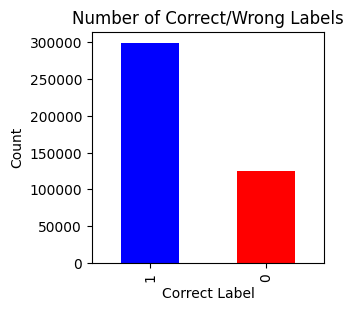

<Figure size 300x300 with 0 Axes>

In [ ]:
#Plotting the number of correct and wrong answers
plt.figure(figsize=(3, 3))

plt.xlabel('Correct Label')
plt.ylabel('Count')
plt.title('Number of Correct/Wrong Labels')

correct_counts = train_label['correct'].value_counts()
print(correct_counts)
plot_df = correct_counts

plot_df.plot(kind="bar", color=['b', 'r'])
plt.figure(figsize=(3, 3))

plt.show()

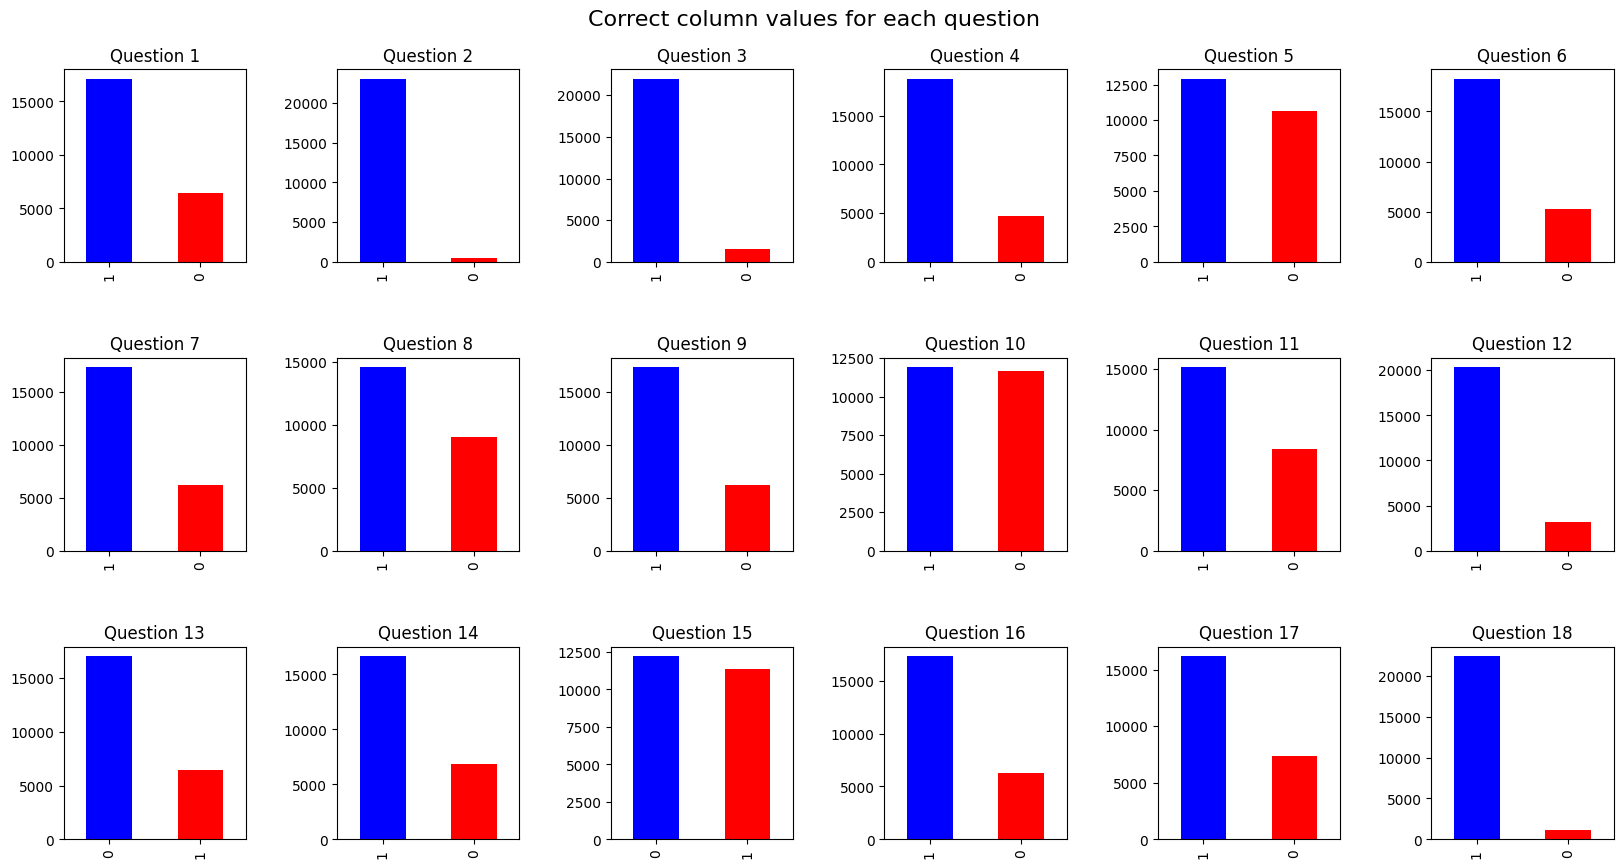

In [ ]:
# Creating a subplot figure
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Correct column values for each question", fontsize=16, y=0.94)

# Iterating over each question and plotting the corresponding data
for ax, question in zip(axes.ravel(), range(1, 19)):
    # Filter the DataFrame for the current question
    filtered_df = train_label[train_label['question'] == question]

    # Count the number of correct and incorrect answers
    correct_counts = filtered_df['correct'].value_counts()

    # Plot the data on the current axis
    correct_counts.plot(ax=ax, kind="bar", color=['b', 'r'])

    # Set axis labels and title
    ax.set_title("Question " + str(question))
    ax.set_xlabel("")

# Show the plot

In [ ]:
CATEGORICAL_FEATURES = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
NUMERICAL_FEATURES = ['elapsed_time','level','page','room_coor_x', 'room_coor_y',
        'screen_coor_x', 'screen_coor_y', 'hover_duration']

EVENT_FEATURES = ['navigate_click','person_click','cutscene_click','object_click',
          'map_hover','notification_click','map_click','observation_click',
          'checkpoint']

In [ ]:
def preprocess_data(data_df):
    # Initialize an empty list to store aggregated dataframes
    aggregated_dataframes = []

    # Process numerical features
    for numerical_feature in NUMERICAL_FEATURES:
        mean_values = data_df.groupby(['session_id', 'level_group'])[numerical_feature].mean()
        aggregated_dataframes.append(mean_values)

        std_values = data_df.groupby(['session_id', 'level_group'])[numerical_feature].std()
        std_values = std_values.rename(numerical_feature + '_std')
        aggregated_dataframes.append(std_values)

    # Convert event flags to integer (0 or 1)
    for event_feature in EVENT_FEATURES:
        data_df[event_feature] = (data_df.event_name == event_feature).astype('int8')

    # Process categorical features
    for categorical_feature in CATEGORICAL_FEATURES:
        unique_values = data_df.groupby(['session_id', 'level_group'])[categorical_feature].nunique()
        unique_values = unique_values.rename(categorical_feature + '_nunique')
        aggregated_dataframes.append(unique_values)


    # Calculate the sum of event occurrences for each group
    for event_feature in EVENT_FEATURES + ['elapsed_time']:
        event_sums = data_df.groupby(['session_id', 'level_group'])[event_feature].sum()
        event_sums = event_sums.rename(event_feature + '_sum')
        aggregated_dataframes.append(event_sums)

    # Drop the original event variables
    data_df.drop(EVENT_FEATURES + ['elapsed_time'], axis=1, inplace=True)

    # Concatenate all aggregated dataframes into a single dataframe
    aggregated_data = pd.concat(aggregated_dataframes, axis=1)

    # Fill missing values with -1
    aggregated_data.fillna(-1, inplace=True)

    # Reset the index to 'session_id'
    aggregated_data = aggregated_data.reset_index()
    aggregated_data = aggregated_data.set_index('session_id')

    return aggregated_data

In [ ]:
dataset = preprocess_data(dataset)
print("Full prepared dataset shape is {}".format(dataset.shape))

Full prepared dataset shape is (70686, 32)


In [ ]:
dataset.head(5)

,level_group,elapsed_time,elapsed_time_std,level,level_std,page,page_std,room_coor_x,room_coor_x_std,room_coor_y,...,navigate_click_sum,person_click_sum,cutscene_click_sum,object_click_sum,map_hover_sum,notification_click_sum,map_click_sum,observation_click_sum,checkpoint_sum,elapsed_time_sum
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,8.579355e+04,49246.539458,1.945455,1.230975,-1.0,-1.000000,7.701275,399.296038,-71.413750,...,81,22,28,11,4,8,2,4,1,1.415594e+07
20090312431273200,13-22,1.040601e+06,126666.129584,17.402382,2.358652,-1.0,-1.000000,-130.347168,622.061374,-162.004303,...,170,123,60,20,14,10,6,3,1,4.370523e+08
20090312431273200,5-12,3.572052e+05,80175.676658,8.054054,2.096919,-1.0,-1.000000,14.306062,357.227701,-57.269321,...,103,104,12,28,9,9,8,1,1,1.057327e+08
20090312433251036,0-4,9.763341e+04,67372.714092,1.870504,1.232616,0.0,0.000000,-84.045959,445.980041,-53.671082,...,49,18,36,15,3,5,3,2,1,1.357104e+07
20090312433251036,13-22,2.498852e+06,777382.529186,17.762529,1.825923,5.1,0.863075,-30.762283,529.575656,-142.861893,...,637,145,65,83,186,14,45,5,1,3.241011e+09


In [ ]:
from sklearn.model_selection import train_test_split

def split_dataset(dataset, test_ratio=0.25):
    data = dataset.index.unique()
    train_x, valid_x = train_test_split(data, test_size=test_ratio)
    return dataset.loc[train_x], dataset.loc[valid_x]

train_x, valid_x = split_dataset(dataset)
print("{} examples in training, {} examples in testing.".format(
    len(train_x), len(valid_x)))

53013 examples in training, 17673 examples in testing.


In [ ]:
def split_label_dataset(question_number):
    # Determine the level group based on the question number
    if question_number <= 3:
        level_group = '0-4'
    elif question_number <= 13:
        level_group = '5-12'
    elif question_number <= 22:
        level_group = '13-22'

    print(f"### Question number: {question_number}, Level group: {level_group}")

    # Filter training and validation data based on the level group
    train_filtered = train_x[train_x['level_group'] == level_group]
    train_users = train_filtered.index.values

    valid_filtered = valid_x[valid_x['level_group'] == level_group]
    valid_users = valid_filtered.index.values

    # Select corresponding labels for the selected question number
    train_labels_filtered = train_label[train_label['question'] == question_number].set_index('session')
    train_labels = train_labels_filtered.loc[train_users, 'correct']

    valid_labels_filtered = train_label[train_label['question'] == question_number].set_index('session')
    valid_labels = valid_labels_filtered.loc[valid_users, 'correct']

    # Add labels to the filtered datasets
    train_filtered['correct'] = train_labels
    valid_filtered['correct'] = valid_labels

    # Convert training and validation data to TensorFlow Datasets format
    train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_filtered.drop('level_group', axis=1), label="correct")
    valid_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(valid_filtered.drop('level_group', axis=1), label="correct")

    return train_dataset, valid_dataset, valid_users, level_group

# **Random Forest Model**

In [ ]:
VALID_USER_LIST = valid_x.index.unique()

# Create a dataframe for storing the predictions of each question for all users
# in the validation set.
# For this, the required size of the data frame is:
# (no: of users in validation set  x no of questions).
# We will initialize all the predicted values in the data frame to zero.
# The dataframe's index column is the user `session_id`s.
rfm_prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST),18)), index=valid_x.index.unique())

# Create an empty dictionary to store the models created for each question.
rfm_models = {}

# Create an empty dictionary to store the evaluation score for each question.
rfm_evaluation_dict ={}

In [ ]:
for q_no in range(1,19):

    train_dataset, valid_dataset, valid_users, level_group= split_label_dataset(q_no)

    # We will now create the Gradient Boosted Trees Model with default settings.
    # By default the model is set to train for a classification task.
    rfm = tfdf.keras.RandomForestModel(verbose=0)
    rfm.compile(metrics=["accuracy"])

    # Train the model.
    rfm.fit(x=train_dataset)

    # Store the model
    rfm_models[f'{level_group}_{q_no}'] = rfm

    # Evaluate the trained model on the validation dataset and store the
    # evaluation accuracy in the `evaluation_dict`.
    inspector = rfm.make_inspector()
    inspector.evaluation()
    rfm_evaluation = rfm.evaluate(x=valid_dataset,return_dict=True)
    rfm_evaluation_dict[q_no] = rfm_evaluation["accuracy"]
    # Use the trained model to make predictions on the validation dataset and
    # store the predicted values in the `prediction_df` dataframe.
    predict = rfm.predict(x=valid_dataset)
    rfm_prediction_df.loc[valid_users, q_no-1] = predict.flatten()

### Question number: 1, Level group: 0-4


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 118ms/step
### Question number: 2, Level group: 0-4


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 47ms/step
### Question number: 3, Level group: 0-4


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 111ms/step - loss: 0.0000e+00 - accuracy: 0.9396


6/6 [==============================] - 1s 115ms/step
### Question number: 4, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 122ms/step - loss: 0.0000e+00 - accuracy: 0.8046


6/6 [==============================] - 1s 134ms/step
### Question number: 5, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 112ms/step
### Question number: 6, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 120ms/step
### Question number: 7, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 85ms/step
### Question number: 8, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 124ms/step
### Question number: 9, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 107ms/step
### Question number: 10, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 2s 182ms/step
### Question number: 11, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 118ms/step
### Question number: 12, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 66ms/step
### Question number: 13, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 80ms/step
### Question number: 14, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 122ms/step
### Question number: 15, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 142ms/step
### Question number: 16, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 71ms/step
### Question number: 17, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 1s 76ms/step
### Question number: 18, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 55ms/step


In [ ]:
for name, value in rfm_evaluation_dict.items():
  print(f"question {name}: accuracy {value:.4f}")

print("\nAverage accuracy", sum(rfm_evaluation_dict.values())/18)

question 1: accuracy 0.7384
question 2: accuracy 0.9800
question 3: accuracy 0.9396
question 4: accuracy 0.8046
question 5: accuracy 0.6327
question 6: accuracy 0.7919
question 7: accuracy 0.7406
question 8: accuracy 0.6320
question 9: accuracy 0.7452
question 10: accuracy 0.6130
question 11: accuracy 0.6612
question 12: accuracy 0.8620
question 13: accuracy 0.7377
question 14: accuracy 0.7163
question 15: accuracy 0.6118
question 16: accuracy 0.7367
question 17: accuracy 0.6931
question 18: accuracy 0.9537

Average accuracy 0.755021784040663


In [ ]:
inspector = rfm_models['0-4_1'].make_inspector()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 SUM_SCORE
	 NUM_AS_ROOT
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("object_click_sum" (1; #17), 73.0),
 ("elapsed_time_sum" (1; #5), 51.0),
 ("person_click_sum" (1; #21), 35.0),
 ("room_fqid_nunique" (1; #26), 27.0),
 ("navigate_click_sum" (1; #15), 26.0),
 ("name_nunique" (1; #14), 18.0),
 ("observation_click_sum" (1; #18), 16.0),
 ("page" (1; #19), 15.0),
 ("page_std" (1; #20), 15.0),
 ("event_name_nunique" (1; #6), 6.0),
 ("elapsed_time" (1; #3), 5.0),
 ("level" (1; #10), 5.0),
 ("elapsed_time_std" (1; #4), 3.0),
 ("level_std" (1; #11), 3.0),
 ("cutscene_click_sum" (1; #2), 1.0),
 ("text_fqid_nunique" (1; #31), 1.0)]

In [ ]:
rfm_true_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST),18)), index=VALID_USER_LIST)
for i in range(18):
    # Get the true labels.
    tmp = train_label.loc[train_label.question == i+1].set_index('session').loc[VALID_USER_LIST]
    rfm_true_df[i] = tmp.correct.values

f1_max_score = 0; rs_max_score = 0; rfm_best_threshold = 0

for threshold in np.arange(0.2,0.8,0.01):
    rfm_y_true = (rfm_true_df.values.reshape((-1)) > 0).astype('int')
    rfm_y_pred = (rfm_prediction_df.values.reshape((-1)) > threshold).astype('int')
    f1 = f1_score(rfm_y_true, rfm_y_pred, average='macro')
    rs= recall_score(rfm_y_true, rfm_y_pred, average='macro')
    if f1 > f1_max_score:
        f1_max_score = f1
        rfm_best_threshold = threshold
    if rs > rs_max_score:
        rs_max_score = rs
print("Best threshold ", rfm_best_threshold, "\tF1 score ", f1_max_score, "\t Recall Score ",  rs_max_score)


Best threshold  0.7100000000000004 	F1 score  0.6762226559039142 	 Recall Score  0.688958137327828


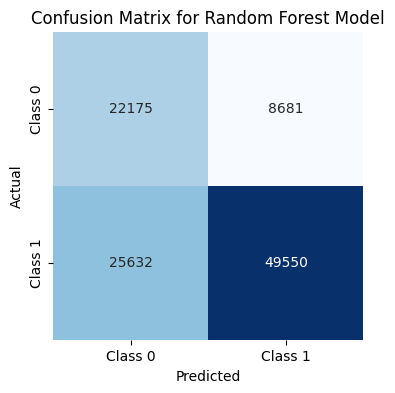

In [ ]:
def plot_confusion_matrix(y_true, y_pred):


    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()


# Plot metrics
plot_confusion_matrix(rfm_y_true, rfm_y_pred)

# **Gradient Boost Tree**

In [ ]:
VALID_USER_LIST = valid_x.index.unique()

# Create a dataframe for storing the predictions of each question for all users
# in the validation set.
# For this, the required size of the data frame is:
# (no: of users in validation set  x no of questions).
# We will initialize all the predicted values in the data frame to zero.
# The dataframe's index column is the user `session_id`s.
gbtm_prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST),18)), index=VALID_USER_LIST)

# Create an empty dictionary to store the models created for each question.
gbtm_models = {}

# Create an empty dictionary to store the evaluation score for each question.
gbtm_evaluation_dict ={}

In [ ]:
for q_no in range(1,19):

    train_dataset, valid_dataset, valid_users, level_group= split_label_dataset(q_no)

    # We will now create the Gradient Boosted Trees Model with default settings.
    # By default the model is set to train for a classification task.
    gbtm = tfdf.keras.GradientBoostedTreesModel( num_trees=100, verbose=0)
    gbtm.compile(metrics=["accuracy"])

    # Train the model.
    gbtm.fit(x=train_dataset)

    # Store the model
    gbtm_models[f'{level_group}_{q_no}'] = gbtm

    # Evaluate the trained model on the validation dataset and store the
    # evaluation accuracy in the `evaluation_dict`.
    inspector = gbtm.make_inspector()
    inspector.evaluation()
    gbtm_evaluation = gbtm.evaluate(x=valid_dataset,return_dict=True)
    gbtm_evaluation_dict[q_no] = gbtm_evaluation["accuracy"]

    # Use the trained model to make predictions on the validation dataset and
    # store the predicted values in the `prediction_df` dataframe.
    gbtm_predict = gbtm.predict(x=valid_dataset)
    gbtm_prediction_df.loc[valid_users, q_no-1] = gbtm_predict.flatten()



### Question number: 1, Level group: 0-4


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 58ms/step
### Question number: 2, Level group: 0-4


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 54ms/step
### Question number: 3, Level group: 0-4


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 34ms/step
### Question number: 4, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 34ms/step
### Question number: 5, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 61ms/step
### Question number: 6, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 34ms/step
### Question number: 7, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 35ms/step
### Question number: 8, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 35ms/step
### Question number: 9, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 64ms/step
### Question number: 10, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 34ms/step
### Question number: 11, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 35ms/step
### Question number: 12, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 62ms/step
### Question number: 13, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 41ms/step
### Question number: 14, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 34ms/step
### Question number: 15, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 59ms/step
### Question number: 16, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 33ms/step
### Question number: 17, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 36ms/step
### Question number: 18, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 38ms/step


In [ ]:
for name, value in gbtm_evaluation_dict.items():
  print(f"question {name}: accuracy {value:.4f}")

print("\nAverage accuracy", sum(gbtm_evaluation_dict.values())/18)

question 1: accuracy 0.7367
question 2: accuracy 0.9800
question 3: accuracy 0.9391
question 4: accuracy 0.8067
question 5: accuracy 0.6362
question 6: accuracy 0.7890
question 7: accuracy 0.7399
question 8: accuracy 0.6299
question 9: accuracy 0.7459
question 10: accuracy 0.6181
question 11: accuracy 0.6590
question 12: accuracy 0.8625
question 13: accuracy 0.7338
question 14: accuracy 0.7160
question 15: accuracy 0.6167
question 16: accuracy 0.7365
question 17: accuracy 0.6929
question 18: accuracy 0.9520

Average accuracy 0.7550500730673472


In [ ]:
inspector = gbtm_models['0-4_1'].make_inspector()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("object_click_sum" (1; #17), 17.0),
 ("page_std" (1; #20), 2.0),
 ("room_fqid_nunique" (1; #26), 2.0),
 ("cutscene_click_sum" (1; #2), 1.0),
 ("navigate_click_sum" (1; #15), 1.0),
 ("person_click_sum" (1; #21), 1.0)]

In [ ]:
gbtm_true_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST),18)), index=VALID_USER_LIST)
for i in range(18):
    # Get the true labels.
    tmp = train_label.loc[train_label.question == i+1].set_index('session').loc[VALID_USER_LIST]
    gbtm_true_df[i] = tmp.correct.values

f1_max_score = 0; rs_max_score = 0; best_threshold = 0

for threshold in np.arange(0.2,0.8,0.01):
    gbtm_y_true = (gbtm_true_df.values.reshape((-1)) > 0).astype('int')
    gbtm_y_pred = (gbtm_prediction_df.values.reshape((-1)) > threshold).astype('int')
    f1 = f1_score(gbtm_y_true, gbtm_y_pred, average='macro')
    rs= recall_score(gbtm_y_true, gbtm_y_pred, average='macro')
    if f1 > f1_max_score:
        f1_max_score = f1
        best_threshold = threshold
    if rs > rs_max_score:
        rs_max_score = rs
print("Best threshold ", best_threshold, "\tF1 score ", f1_max_score, "\t Recall Score ",  rs_max_score)

Best threshold  0.6200000000000003 	F1 score  0.676709786973926 	 Recall Score  0.6928041603744717


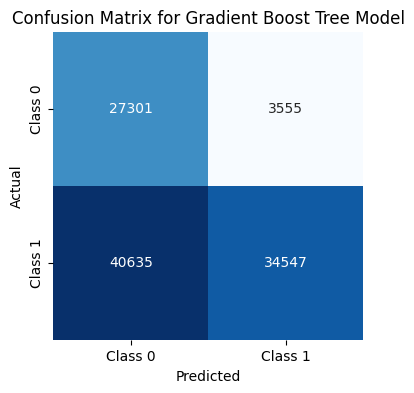

In [ ]:
# Plot metrics
def plot_confusion_matrix(y_true, y_pred):


    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Gradient Boost Tree Model')
    plt.show()

plot_confusion_matrix(gbtm_y_true, gbtm_y_pred)

**CART MODEL**

In [ ]:
VALID_USER_LIST = valid_x.index.unique()

# Create a dataframe for storing the predictions of each question for all users
# in the validation set.
# For this, the required size of the data frame is:
# (no: of users in validation set  x no of questions).
# We will initialize all the predicted values in the data frame to zero.
# The dataframe's index column is the user `session_id`s.
cart_prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST),18)), index=VALID_USER_LIST)

# Create an empty dictionary to store the models created for each question.
cart_models = {}

# Create an empty dictionary to store the evaluation score for each question.
cart_evaluation_dict ={}

In [ ]:
for q_no in range(1,19):

    train_dataset, valid_dataset, valid_users, level_group= split_label_dataset(q_no)

    # We will now create the Gradient Boosted Trees Model with default settings.
    # By default the model is set to train for a classification task.
    cart = tfdf.keras.CartModel(max_depth=20, verbose=0)
    cart.compile(metrics=["accuracy"])

    # Train the model.
    cart.fit(x=train_dataset)

    # Store the model
    cart_models[f'{level_group}_{q_no}'] = cart

    # Evaluate the trained model on the validation dataset and store the
    # evaluation accuracy in the `evaluation_dict`.
    inspector = cart.make_inspector()
    inspector.evaluation()
    cart_evaluation = cart.evaluate(x=valid_dataset,return_dict=True)
    cart_evaluation_dict[q_no] = cart_evaluation["accuracy"]

    # Use the trained model to make predictions on the validation dataset and
    # store the predicted values in the `prediction_df` dataframe.
    predict = cart.predict(x=valid_dataset)
    cart_prediction_df.loc[valid_users, q_no-1] = predict.flatten()



### Question number: 1, Level group: 0-4


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 34ms/step
### Question number: 2, Level group: 0-4


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 65ms/step
### Question number: 3, Level group: 0-4


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 34ms/step
### Question number: 4, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 35ms/step
### Question number: 5, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 33ms/step
### Question number: 6, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 38ms/step
### Question number: 7, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 55ms/step
### Question number: 8, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 54ms/step
### Question number: 9, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 39ms/step
### Question number: 10, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 33ms/step
### Question number: 11, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 34ms/step
### Question number: 12, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 57ms/step
### Question number: 13, Level group: 5-12


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 33ms/step
### Question number: 14, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 36ms/step
### Question number: 15, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 33ms/step
### Question number: 16, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 35ms/step
### Question number: 17, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 61ms/step
### Question number: 18, Level group: 13-22


<ipython-input-19-9084900fc21f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['correct'] = train_labels
<ipython-input-19-9084900fc21f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_filtered['correct'] = valid_labels


6/6 [==============================] - 0s 33ms/step


In [ ]:
for name, value in cart_evaluation_dict.items():
  print(f"question {name}: accuracy {value:.4f}")

print("\nAverage accuracy", sum(cart_evaluation_dict.values())/18)

question 1: accuracy 0.7136
question 2: accuracy 0.9800
question 3: accuracy 0.9367
question 4: accuracy 0.7873
question 5: accuracy 0.5982
question 6: accuracy 0.7732
question 7: accuracy 0.7292
question 8: accuracy 0.6114
question 9: accuracy 0.7252
question 10: accuracy 0.5732
question 11: accuracy 0.6452
question 12: accuracy 0.8572
question 13: accuracy 0.7138
question 14: accuracy 0.7002
question 15: accuracy 0.5817
question 16: accuracy 0.7175
question 17: accuracy 0.6807
question 18: accuracy 0.9516

Average accuracy 0.7375657757123312


In [ ]:
inspector = cart_models['0-4_1'].make_inspector()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("elapsed_time_std" (1; #4), 1.0)]

In [ ]:
CART_true_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST),18)), index=VALID_USER_LIST)
for i in range(18):
    # Get the true labels.
    tmp = train_label.loc[train_label.question == i+1].set_index('session').loc[VALID_USER_LIST]
    CART_true_df[i] = tmp.correct.values

f1_max_score = 0; rs_max_score = 0; cart_best_threshold = 0

for threshold in np.arange(0.2,0.8,0.01):
    cart_y_true = (CART_true_df.values.reshape((-1)) > 0).astype('int')
    cart_y_pred = (cart_prediction_df.values.reshape((-1)) > threshold).astype('int')
    f1 = f1_score(cart_y_true, cart_y_pred, average='macro')
    rs= recall_score(cart_y_true, cart_y_pred, average='macro')
    if f1 > f1_max_score:
        f1_max_score = f1
        cart_best_threshold = threshold
    if rs > rs_max_score:
        rs_max_score = rs
print("Best threshold ", cart_best_threshold, "\tF1 score ", f1_max_score, "\t Recall Score ",  rs_max_score)

Best threshold  0.6300000000000003 	F1 score  0.652376968475489 	 Recall Score  0.6672867528267952


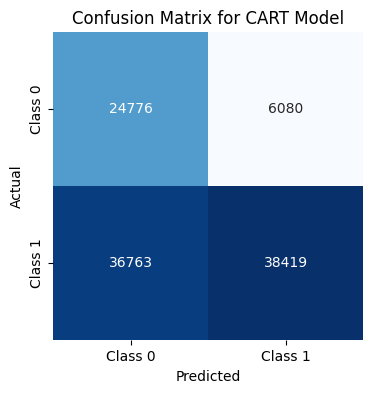

In [ ]:
def plot_confusion_matrix(y_true, y_pred):


    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for CART Model')
    plt.show()


plot_confusion_matrix(cart_y_true,cart_y_pred)

Model

In [ ]:
VALID_USER_LIST = valid_x.index.unique()

# Create a dataframe for storing the predictions of each question for all users
# in the validation set.
# For this, the required size of the data frame is:
# (no: of users in validation set  x no of questions).
# We will initialize all the predicted values in the data frame to zero.
# The dataframe's index column is the user `session_id`s.
svm_prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST),18)), index=VALID_USER_LIST)

# Create an empty dictionary to store the models created for each question.
svm_model = {}

# Create an empty dictionary to store the evaluation score for each question.
svm_evaluation_dict ={}

## Predicting using Test Dataset

In [ ]:
test_data_path = "drive/My Drive/test.csv"
test_dataset= pd.read_csv(test_data_path, dtype=data_types)
print(f"Full test dataset shape: {test_dataset.shape}")
test_dataset.head(5)

Full test dataset shape: (3728, 21)


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0.0,cutscene_click,basic,0.0,NaN,-413.991394,75.685310,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965.0,person_click,basic,0.0,NaN,-105.991402,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614.0,person_click,basic,0.0,NaN,-418.991394,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330.0,person_click,basic,0.0,NaN,-110.991402,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397.0,person_click,basic,0.0,NaN,-110.991402,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0


In [ ]:
print(test_dataset['session_level'].unique())
print(test_dataset['session_id'].unique())

[0 1 2 3 4 5 6 7 8]
[20090109393214576 20090312143683264 20090312331414616]


In [ ]:
test_model=rfm_models
# Prepare the test dataset
test_x = preprocess_data(test_dataset)  # Load the test dataset features

# Create a prediction DataFrame for the test dataset
test_prediction_df = pd.DataFrame(columns=range(1, 19))

# Iterate through questions and make predictions using the corresponding RFM models
for q_no in range(1, 19):
    if q_no <= 3:
        level_group = '0-4'
    elif q_no <= 13:
        level_group = '5-12'
    elif q_no <= 22:
        level_group = '13-22'
    # Retrieve the trained RFM model for the current question and level group
    test = test_model[f'{level_group}_{q_no}']
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_x.loc[:, test_x.columns != 'level_group'])

    # Make predictions for the current question using the trained RFM model
    test_predictions = test.predict(x=test_ds)
    test_predictions=(test_predictions > rfm_best_threshold).astype(int)

    # Store the predictions in the test prediction DataFrame
    test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 221ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 246ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 256ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 271ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 281ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 264ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 247ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 261ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 462ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 1s 1s/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 276ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 272ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 244ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 254ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 235ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 244ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


1/1 [==============================] - 0s 266ms/step


<ipython-input-47-46f2dd938f05>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_prediction_df.iloc[:, q_no-1] = test_predictions.flatten()


In [ ]:
print(test_prediction_df)
test_prediction_df.head()

   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18
0   1   1   1   1   0   1   1   0   1   0   0   1   0   0   0   1   0   1
1   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   1   1
2   0   1   1   1   0   1   1   1   1   0   0   1   0   0   0   0   0   1
3   0   1   1   1   0   1   1   0   1   0   0   1   0   1   0   1   0   1
4   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1
5   0   1   0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   1
6   1   1   1   1   0   1   1   0   1   0   0   1   0   0   0   1   0   1
7   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   1   1   1
8   0   1   1   1   0   1   1   1   1   0   1   1   0   1   0   1   1   1


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,1,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
2,0,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1
3,0,1,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


from matplotlib import pyplot as plt
_df_0[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[4].plot(kind='hist', bins=20, title=4)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=4, y=6, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[5]
  ys = series[1]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values(5, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(5)
_ = plt.ylabel(1)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[5]
  ys = series[2]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values(5, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(5)
_ = plt.ylabel(2)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[5]
  ys = series[3]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values(5, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(5)
_ = plt.ylabel(3)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[5]
  ys = series[4]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values(5, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(5)
_ = plt.ylabel(4)

from matplotlib import pyplot as plt
_df_12[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15[4].plot(kind='line', figsize=(8, 4), title=4)
plt.gca().spines[['top', 'right']].set_visible(False)